# DBSCAN算法及其应用
**DBSCAN算法**：该算法是一种**基于密度**的聚类算法。  
**特点**：

- 聚类时无需预先指定簇的个数；
- 最终簇的个数也不确定。

**DBSCAN算法将数据分为三类**：

- 核心点：在半径Eps内含有超过MinPts数目的点；（即核心点对应稠密区域内部的点）
- 边界点：在半径Eps内点的数目小于MinPts，但是落在核心点的邻域内；（即边界点对应稠密区域对应稀疏区域的点）
- 噪声点：即非核心点，又非边界点的点

**DBSCAN算法的流程**

- 将所有点标记为核心点、边界点或噪声点
- 删除噪声点
- 为距离在半径Eps之内的所有核心点之间赋予一条边
- 每组连通的核心点形成一个簇
- 将每个边界点指派到一个与之关联的核心点的簇中（即对应核心点半径范围内）

# 案例：学生上网时间分布
**数据介绍**：290条大学校园网日志数据记录了大学生校园网使用情况，其中包括：用户ID、设备的MAC地址、IP地址、开始上网时间、停止上网时间、上网时长、校园网套餐等。  
**目的**：分析大学生上网（上网时间和上网时长）模式。  
**分析过程**：

- 建立工程，导入相关包（DBSCAN）
- 加载数据及数据预处理
- 上网时长（在线时长）的聚类分析
- 上网时间（开始上网时间）的聚类分析
- 分析结果

## 一、开始上网时间的聚类分析

### 1、建立工程，导入相关包（NumPy、DBSCAN）
**DBSCAN的主要参数**：

- eps：两个样本被看作邻居节点的最大距离
- min_samples：一个簇内的样本数
- metric：距离的计算方式

In [1]:
import os
import numpy as np
import sklearn.cluster as skc
from sklearn import metrics
import matplotlib.pyplot as plt

file_path = os.chdir('D:\\学习资料\\Python项目\\案例数据')
os.getcwd()

'D:\\学习资料\\Python项目\\案例数据'

### 2、读取数据并进行预处理

In [13]:
# -*- coding:utf-8 -*-

# 设置初始容器Mac2id、onlinetimes用于存放MAC地址、上网时长
mac2id = dict()
onlinetimes = []

# 使用open函数打开数据文件
file = open('学生月上网时间分布-TestData.txt', encoding = 'utf-8')

for line in file:
    
    # 提取每一条数据中的MAC地址、上网时长和开始上网时间的小时部分
    mac = line.split(',')[2]
    
    # 为使后边计算中无需每次调用列表循环修改其中元素类型，可修改为：
    # onlinetime = int(line.split(',')[6])
    # starttime = int(line.split(',')[4].split(' ')[1].split(':')[0])
    onlinetime = line.split(',')[6] 
    starttime = line.split(',')[4].split(' ')[1].split(':')[0]
    
    # 判断若mac不在字典mac2id中，则以上网时长onlinetimes列表的长度按顺序进行排序
    if mac not in mac2id:
        mac2id[mac] = len(onlinetimes)
        onlinetimes.append((starttime, onlinetime))
    else:
        onlinetimes[mac2id[mac]] = [(starttime, onlinetime)]
        
# -1表示设定一个列为2的二维数组，由Python自动计算行数
# 将onlinetimes上网时长列表转换为289 * 2的数组
real_X = np.array(onlinetimes).reshape((-1, 2)) 

### 3、上网时间聚类，创建DBSCAN算法实例，并进行训练获得标签

In [3]:
# 提取该数组中第一列数据，即开始上网时间
x = real_X[:, 0:1]

# 调用DBSCAN模块，设定半径eps = 0.01，每个簇最小样本数为20
# 使用函数对开始上网时间x按照指定特征或距离进行聚类
db = skc.DBSCAN(eps = 0.01, min_samples = 20).fit(x)

# 根据聚类结果为每个簇的标签（此处为-1、0、1、2、3、4、5）
# 噪声点默认对应的标签为-1
labels = db.labels_

# 打印各个点对应的标签
print('Labels：')
print(labels)

# 计算标签为-1（即噪声点）在所有标签中的占比并将其打印
raito = len(labels[labels[:] == -1]) / len(labels)
print('Noise raito：{:.2%}'.format(raito))

Labels：
[ 0 -1  0  1 -1  1  0  1  2 -1  1  0  1  1  3 -1 -1  3 -1  1  1 -1  1  3  4
 -1  1  1  2  0  2  2 -1  0  1  0  0  0  1  3 -1  0  1  1  0  0  2 -1  1  3
  1 -1  3 -1  3  0  1  1  2  3  3 -1 -1 -1  0  1  2  1 -1  3  1  1  2  3  0
  1 -1  2  0  0  3  2  0  1 -1  1  3 -1  4  2 -1 -1  0 -1  3 -1  0  2  1 -1
 -1  2  1  1  2  0  2  1  1  3  3  0  1  2  0  1  0 -1  1  1  3 -1  2  1  3
  1  1  1  2 -1  5 -1  1  3 -1  0  1  0  0  1 -1 -1 -1  2  2  0  1  1  3  0
  0  0  1  4  4 -1 -1 -1 -1  4 -1  4  4 -1  4 -1  1  2  2  3  0  1  0 -1  1
  0  0  1 -1 -1  0  2  1  0  2 -1  1  1 -1 -1  0  1  1 -1  3  1  1 -1  1  1
  0  0 -1  0 -1  0  0  2 -1  1 -1  1  0 -1  2  1  3  1  1 -1  1  0  0 -1  0
  0  3  2  0  0  5 -1  3  2 -1  5  4  4  4 -1  5  5 -1  4  0  4  4  4  5  4
  4  5  5  0  5  4 -1  4  5  5  5  1  5  5  0  5  4  4 -1  4  4  5  4  0  5
  4 -1  0  5  5  5 -1  4  5  5  5  5  4  4]
Noise raito：22.15%


### 4、输出标签，查看结果

In [4]:
# 采用集合中不含重复数据的性质
# 剔除聚类结果中的噪声点
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# 打印除去噪声点外，其余聚类结果
print('Estimated number of clusters: %d' % n_clusters)

# 打印所有样本的平均轮廓系数
print('Silhouette Coefficient：%0.3f' % metrics.silhouette_score(x, labels))

for i in range(n_clusters):
    
    # 打印第i个聚类结果及对应的样本点
    print('Cluster ', i, ':')
    
    # flatten方法用于将多维数组转化为一维数组
    print(list(x[labels == i].flatten()))

Estimated number of clusters: 6
Silhouette Coefficient：0.710
Cluster  0 :
['22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22']
Cluster  1 :
['23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23']
Cluster  2 :
['20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20']
Cluster  

### 5、直方图展示结果
由直方图可看出，大学生开始上网时间主要集中于22、23点

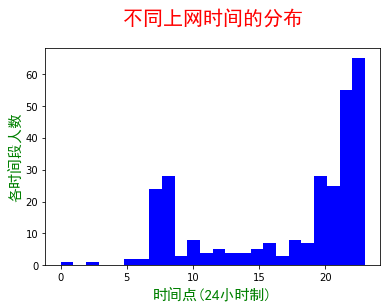

In [5]:
# 由于数组中元素均为字符串，故需将其转化为数值作图
start_time = []
for num in x:
    start_time.append(int(num[0]))

plt.hist(start_time, 24, color = 'blue')
plt.xlabel('时间点(24小时制)', fontproperties = 'SimHei', fontsize = 15, color = 'green')
plt.ylabel('各时间段人数', fontproperties = 'SimHei', fontsize = 15, color = 'green')
plt.title('不同上网时间的分布\n', fontproperties = 'SimHei', fontsize = 20, color = 'red')
plt.show()

# 数据变换
类似于下图中，原始数据分布存在严重右偏（或其他左偏）的情形时，此时需对原始数据进行变换处理，**常用数据变换方法**：

- 对数变换，即对原始数据取对数；


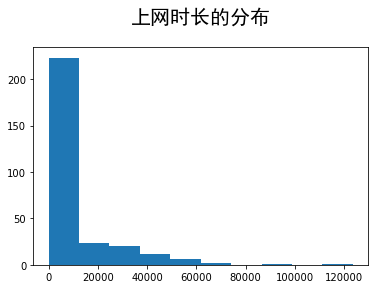

In [6]:
time_len = []
for time in real_X[:, -1]:
    time_len.append(int(time))
    
plt.hist(time_len)
plt.title('上网时长的分布\n', fontproperties = 'SimHei', fontsize = 20)
plt.show()

## 二、上网时长的聚类

### 1、数据处理
- 由于real_X列表中数据均为字符串类型，故将其转换为整型
- 由于存在0，无法取对数，故将所有数据进行加1处理
- 由于上网时长的数据存在右偏，故采用对数变换对原始数据进行处理

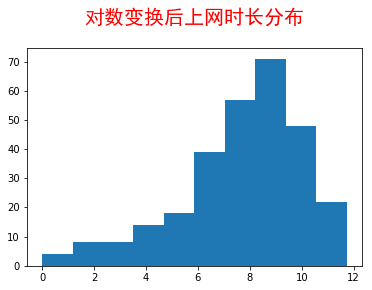

In [39]:
# 转换数据
# 由于real_X列表中数据均为字符串类型，故将其转换为整型
# 由于存在0，无法取对数，故将所有数据进行加1处理
online_time = []

for time in real_X[:, -1]:
    online_time.append(int(time) + 1)

# 对原始数据进行对数变换
x = np.log(online_time)

# 做直方图，观察对数变换后数据分布
plt.hist(x)
plt.title('对数变换后上网时长分布\n', fontproperties = 'SimHei', fontsize = 20, color = 'red')
plt.show()

In [96]:
# 由于x数组的列数不确定，因此计算时只能计算一个样本，故需要设定其维度，转化为289行、1列
X = x.reshape((-1, 1))

# 调用DBSCAN模块，设定半径eps = 0.14，簇内最小样本数min_samples= 10
# 使用fit函数进行拟合
db = skc.DBSCAN(eps = 0.14, min_samples = 10).fit(X)

# 利用属性labels_获得各个样本对应的标签，并将其打印
Labels = db.labels_
print('Labels：')
print(Labels)

# 计算噪声点在所有点中的占比，并将其打印
raito = len(Labels[Labels == -1]) / len(Labels)
print('Noise raito：{0:.2%}'.format(raito))

Labels：
[ 0  1  0  4  1  2  0  2  0  3 -1  0 -1 -1  0  3  1  0  3  2  2  1  2  0  1
  1 -1 -1  0  0  0  0  1  0 -1  0  0  0  2  0  1  0 -1 -1  0  0  0  3  2  0
 -1  1  0  1  0  0 -1  2  0  0  0  1  3  3  0  2  0 -1  3  0  0  2  0  0  0
  2  1 -1  0  0  0  0  0  0  1 -1  0  3  1  0  1  1  0  1  0  1  0  0 -1  1
  1  0  0  2  0  0  0  2  2  0  0  0 -1  0  0  4  0  1  2 -1  0  1  0  2  0
 -1 -1 -1  0  1  1  3 -1  0  1  0  2  0  0  2  1  1  0  0  0  0  4 -1  0  0
  0  0  2  0  0  0  0 -1  2  0  0  0  0  4  0  0 -1  0  2  0  0 -1  0  1  4
  0  0 -1  1  1  0  0  2  0  0  3 -1 -1 -1  1  0  0  2  1  0 -1 -1  3  2  2
  0  0  3  0  1  0  0  0  3  2  0 -1  0  1 -1 -1  0  2  2  1  4  0  0  1  0
  2  0  0  0  0  1  1  0  0  1  0  4 -1 -1  0  0  0 -1 -1  1 -1  4 -1  0  2
  2 -1  2  1  2 -1  0 -1  0  2  2  1 -1  0  1  2 -1 -1  1 -1  2 -1 -1  1  4
  2  3  1  0  4  0  0  4  2  4  0  0  2 -1]
Noise raito：16.96%


In [63]:
# 计算除标签为-1的噪声点外剩余聚类结果个数
n_clusters = len(set(Labels)) - (1 if -1 in Labels else 0)

# 打印聚类数目以及轮廓系数
print('Estimated number of clusters：%d' % n_clusters)
print('Silhouette Coefficient：%.3f' % metrics.silhouette_score(X, Labels))

Estimated number of clusters：5
Silhouette Coefficient：0.227


In [97]:
for i in range(n_clusters):
    # 打印“Cluster i：”的形式
    print('Cluster', i, ':')
    
    # 计算每个聚类结果中包含的样本数
    count = len(X[Labels == i])
    
    # 计算每个聚类结果中包含样本的均值
    mean = np.mean(np.exp(X[Labels == i]) - 1)
    
    # 计算每个聚类结果中包含样本的标准差
    std = np.std(np.exp(X[Labels == i]) - 1)
    
    # 分别打印count、mean、std以及每个聚类结果中包含的样本
    print('\t number of sample：', count)
    print('\t mean of sample：{0:.1f}'.format(mean))
    print('\t std of sample：{0:.1f}'.format(std))
#     print('\t sample of cluster：{}'.format(list(np.exp(X[Labels == i].flatten()) - 1)))

Cluster 0 :
	 number of sample： 128
	 mean of sample：5864.3
	 std of sample：3498.1
Cluster 1 :
	 number of sample： 46
	 mean of sample：36835.1
	 std of sample：11314.1
Cluster 2 :
	 number of sample： 40
	 mean of sample：843.2
	 std of sample：242.9
Cluster 3 :
	 number of sample： 14
	 mean of sample：16581.6
	 std of sample：1186.7
Cluster 4 :
	 number of sample： 12
	 mean of sample：338.4
	 std of sample：31.9


# 补充知识：轮廓系数（silhouette score）
1、**作用**：轮廓系数主要用于判断聚类效果的好坏，是对聚类效果有效性的解释和验证。  
2、**基本原理**：

- 计算样本i与同一簇其他样本的平均距离$a_i$。$a_i$越小，则表明样本i与同一簇内其他样本越相似，即越应该被分到该簇中。$a_i$被称为簇内不相似度，簇k内所有样本$a_i$的均值称簇k的簇不相似度；
- 计算样本i与其他簇内（如：簇j）所有样本的平均距离$b_{ij}$，称$b_{ij}$为样本i与簇j的不相似度，即样本i的簇间不相似度为：$b_i = min\{b_{i1}, b_{i2}, ..., b_{ij}\}$，$b_i$越大，则表明簇间不相似度越大，即样本i越不属于其他簇。
- 根据样本的簇内不相似度$a_i$和簇间不相似度$b_i$，计算样本i的轮廓系数：
$$s(i) = \frac{b(i) - a(i)}{max\{a(i), b(i)\}}\implies
s(i) = \begin{cases}
        1 - \frac{a(i)}{b(i)}, & \text{a(i) < b(i)} \\
        0, & \text{a(i) = b(i)} \\
        \frac{b(i)}{a(i)} - 1, & \text{a(i) > b(i)}
        \end{cases}
$$

- 根据样本i的轮廓系数可得：
 - 若$s(i)$接近于1，则表明样本i聚类结果合理；
 - 若$s(i)$接近于-1，则表明样本i聚类结果不合理；
 - 若$s(i)$接近于0，则表明样本位于两个簇的边界上。
- 所有样本$s(i)$的均值即为平均轮廓系数，可用于衡量该聚类效果的优劣。